<a href="https://colab.research.google.com/github/YosserAkili/DeepLearning_in_the_automative_industry_Capgemini/blob/main/Telecom_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project carried out by: Yosser Akili
## Group: A

## Dataset : Telecom Customer Churn

## Variable Y (target) : Churn

# 📖 I. Introduction

The dataset used in this study originates from a telecommunications company based in Iran. This dataset includes information on customer behavior over a one-year period, with each line representing a different customer. In addition to an unsubscribe label, the dataset also includes data on various customer activities, such as call failures and subscription duration.

The objective of the study is to analyze this dataset and explore patterns or trends that could assist the company in improving customer retention rates.

This analysis is crucial for telecommunications companies to ensure they provide high-quality services and meet the needs of their customers. By leveraging the insights gained from this analysis, the company can make informed decisions and take proactive measures to reduce customer churn and enhance overall customer satisfaction.

##  Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_curve
#from imblearn.pipeline import make_pipeline
#from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
#from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

## 💾 Data


| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complains              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

In [4]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


This database contains information for 3150 customers of an Iranian telecommunications company, collected randomly over 12 months.

The database consists of 13 columns including: call failures, SMS frequency, number of complaints, subscription duration, age group, charge amount, service type, usage seconds, status, usage frequency, and customer value.

All attributes, except churn, represent data from the first 9 months, with unsubscribe labels representing the customer states at the end of the 12 months, allowing for a planning period of 3 months. The dataset aims to assist the company in improving retention rates and customer satisfaction through the analysis of customer behavior.

#  📊 II. EDA

In [5]:
df.shape

(3150, 16)

In [6]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [7]:
df.dtypes.value_counts()

int64      13
float64     3
dtype: int64

In [8]:
# check for missing values
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
FN                         0
FP                         0
Churn                      0
dtype: int64

### 2. Outliers detection with Z-score

In [9]:
# Calcul de la moyenne et l'ecart-type
mean_call_failure = df['Call  Failure'].mean()
std_call_failure = df['Call  Failure'].std()

mean_subscription_length = df['Subscription  Length'].mean()
std_subscription_length = df['Subscription  Length'].std()

mean_seconds_of_use = df['Seconds of Use'].mean()
std_seconds_of_use = df['Seconds of Use'].std()

mean_frequency_of_use = df['Frequency of use'].mean()
std_frequency_of_use = df['Frequency of use'].std()

mean_frequency_of_SMS = df['Frequency of SMS'].mean()
std_frequency_of_SMS = df['Frequency of SMS'].std()

mean_distinct_called_numbers = df['Distinct Called Numbers'].mean()
std_distinct_called_numbers = df['Distinct Called Numbers'].std()

mean_customer_value = df['Customer Value'].mean()
std_customer_value = df['Customer Value'].std()

# Calcul des  Z-scores
z_scores_call_failure = np.abs((df['Call  Failure'] - mean_call_failure) / std_call_failure)
z_scores_subscription_length = np.abs((df['Subscription  Length'] - mean_subscription_length) / std_subscription_length)
z_scores_seconds_of_use = np.abs((df['Seconds of Use'] - mean_seconds_of_use) / std_seconds_of_use)
z_scores_frequency_of_use = np.abs((df['Frequency of use'] - mean_frequency_of_use) / std_frequency_of_use)
z_scores_frequency_of_SMS = np.abs((df['Frequency of SMS'] - mean_frequency_of_SMS) / std_frequency_of_SMS)
z_scores_distinct_called_numbers = np.abs((df['Distinct Called Numbers'] - mean_distinct_called_numbers) / std_distinct_called_numbers)
z_scores_customer_value = np.abs((df['Customer Value'] - mean_customer_value) / std_customer_value)

# detection des outliers
outliers_call_failure = df[z_scores_call_failure > 3.5]
outliers_subscription_length = df[z_scores_subscription_length > 3.5]
outliers_seconds_of_use = df[z_scores_seconds_of_use > 3.5]
outliers_frequency_of_use = df[z_scores_frequency_of_use > 3.5]
outliers_frequency_of_SMS = df[z_scores_frequency_of_SMS > 3.5]
outliers_distinct_called_numbers = df[z_scores_distinct_called_numbers > 3.5]
outliers_customer_value = df[z_scores_customer_value > 3.5]


print(outliers_call_failure['Call  Failure'])
print(outliers_subscription_length['Subscription  Length'])
print(outliers_seconds_of_use['Seconds of Use'])
print(outliers_frequency_of_use['Frequency of use'])
print(outliers_frequency_of_SMS['Frequency of SMS'])
print(outliers_distinct_called_numbers['Distinct Called Numbers'])
print(outliers_customer_value['Customer Value'])

2362    35
2383    35
2562    34
2583    34
2962    36
2972    34
2983    36
Name: Call  Failure, dtype: int64
Series([], Name: Subscription  Length, dtype: int64)
Series([], Name: Seconds of Use, dtype: int64)
Series([], Name: Frequency of use, dtype: int64)
13      483
63      488
113     478
163     493
213     473
263     498
313     468
363     494
413     472
463     504
563     515
663     492
713     474
763     475
813     491
863     491
963     483
1013    483
1063    476
1113    481
1163    471
1213    486
1313    491
1413    487
1513    497
1613    508
1713    485
1763    467
1813    468
1863    484
1913    484
2013    476
2063    476
2113    490
2163    495
2213    485
2263    500
2313    480
2363    505
2413    475
2463    501
2513    479
2563    511
2613    469
2663    522
2763    499
2813    481
2863    482
2913    498
2963    498
3063    490
3113    490
Name: Frequency of SMS, dtype: int64
183     84
283     86
383     85
483     95
583     84
1333    84
1533    93
21

According to the Z-score, we detected outliers in the numeric columns of our database. However, upon examining these outlier values, there is no evidence suggesting that these values are incorrect or outliers in the traditional sense. Therefore, we can conclude that the outliers detected by the Z-score method are valid data points and should not be removed or modified.







### 3. Univariate Analysis

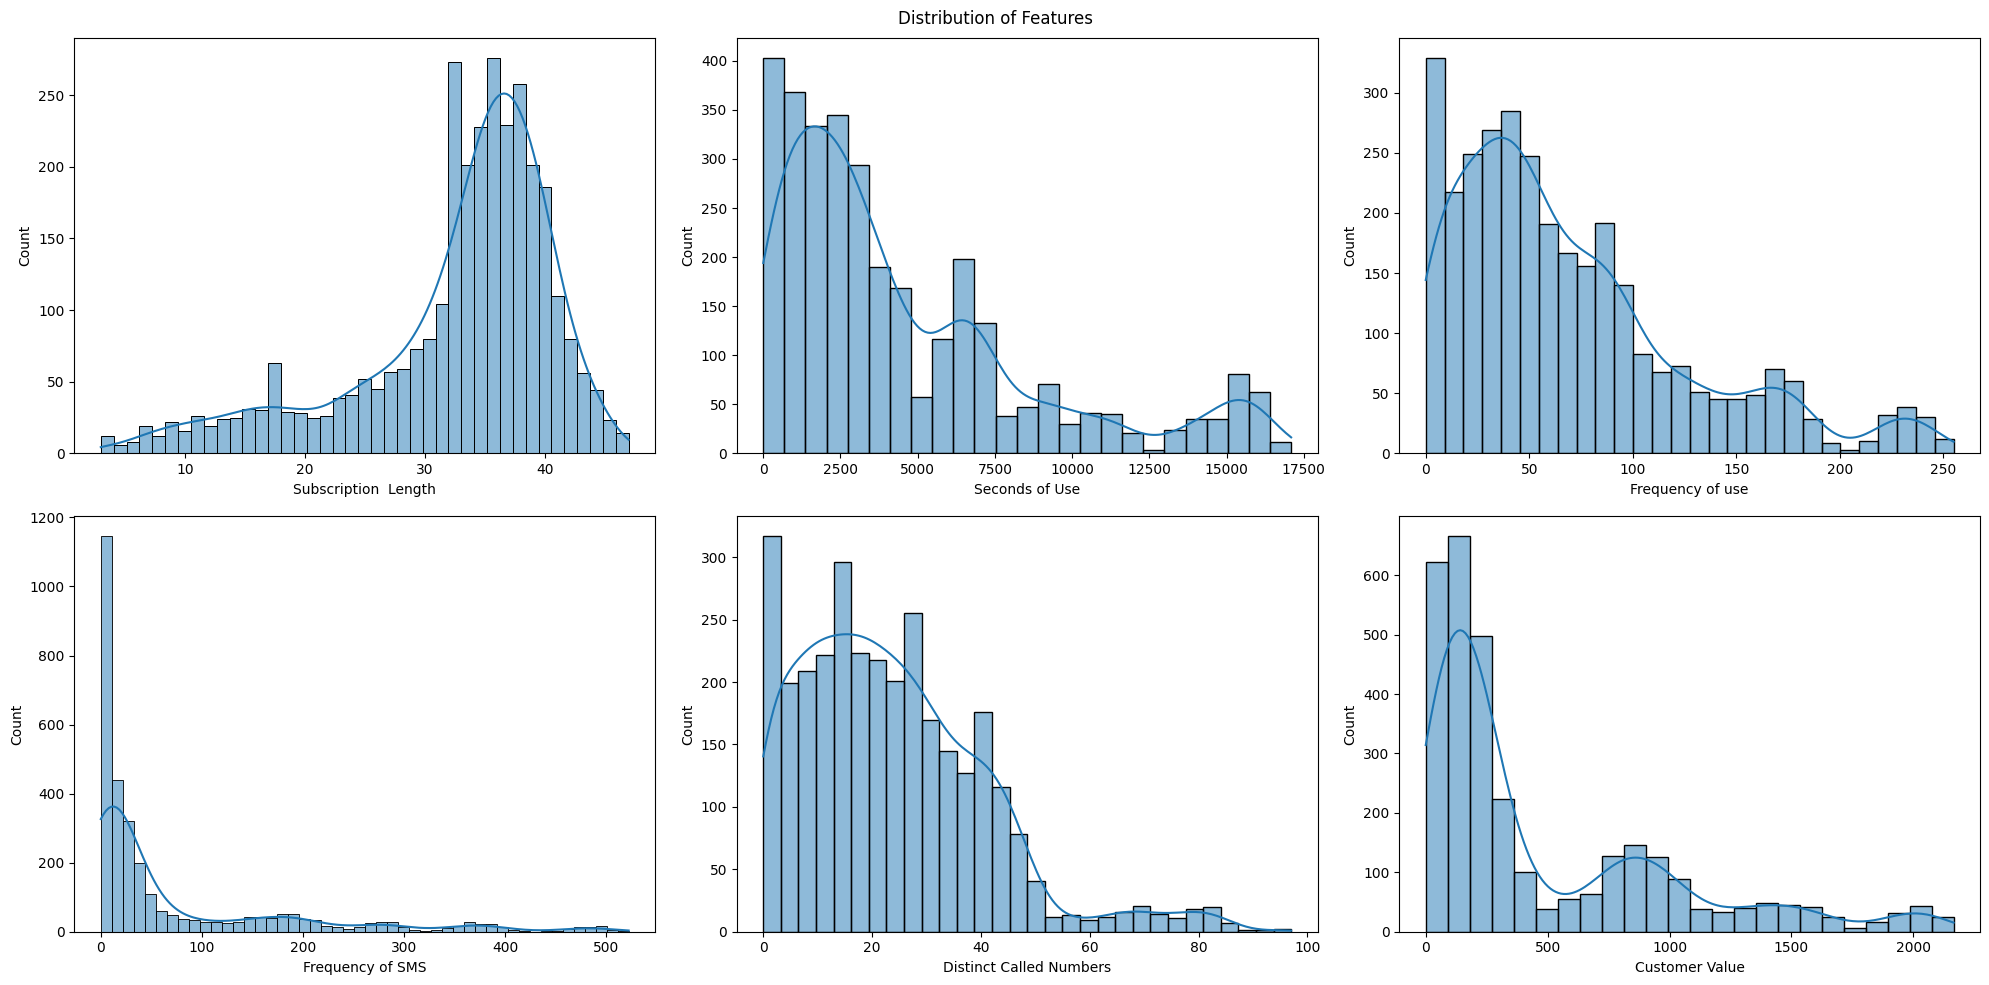

In [10]:
cols = ['Subscription  Length', 'Seconds of Use',
        'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers',
        'Customer Value']


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes = axes.flatten()

# Plot de la distribution de chaque colonne
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])

# Ajout des titres et ajustement
plt.suptitle('Distribution of Features')
plt.tight_layout()

After plotting the distributions and observing that they are asymmetric, it is evident that preprocessing is necessary to make the data more suitable for modeling. Asymmetric data can pose challenges with statistical methods and make it difficult to identify meaningful patterns in the data. Therefore, it is important to transform the data to mitigate the impact of outliers and bring the distribution closer to a normal distribution.

#### Visualisation: Target

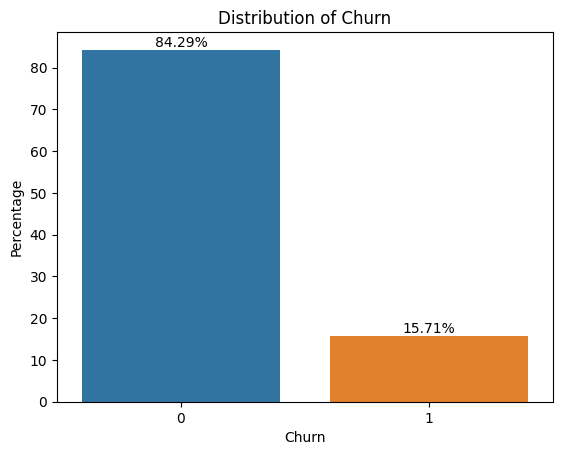

In [11]:
# Barplot
ax = sns.barplot(x='Churn', y='Churn', data=df, estimator=lambda x: len(x) / len(df) * 100)

# Ajout des titres et des labels
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Distribution of Churn')

# Ajout des pourcentages
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            '{:.2f}%'.format(p.get_height()),
            ha='center',
            va='bottom')

plt.show()

Even though there is a substantial difference between the two classes (84,29% and 15.71%), it would not be accurate to claim that there is an imbalance. Data is typically considered imbalanced when one class comprises less than 5% of the total. In this case, while there is a noticeable discrepancy, it does not meet the criteria for being classified as imbalanced data.

# III. Pre-processing

First we have have to split the data :

In [12]:
df=df.drop(['Age'],axis=1)

In [13]:

y = df['Churn']
X = df.drop('Churn', axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,FN,FP
2850,11,0,35,0,4675,71,4,18,2,1,1,231.570,208.4130,73.1570
1075,0,0,32,0,2535,16,0,12,3,1,1,102.040,91.8360,60.2040
1019,3,0,37,0,7508,127,384,43,2,1,1,2071.575,1864.4175,257.1575
494,6,0,18,2,2295,36,49,29,2,1,1,325.395,292.8555,82.5395
2496,19,0,20,1,9418,185,91,47,5,1,1,280.545,252.4905,78.0545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2,0,38,0,2170,38,276,15,3,1,1,1192.320,1073.0880,169.2320
803,12,0,43,1,4198,72,9,36,1,1,1,284.350,255.9150,78.4350
189,5,0,30,1,1648,41,40,72,4,1,1,142.225,128.0025,64.2225
2463,11,0,43,2,3580,41,501,15,3,1,1,2148.840,1933.9560,264.8840


In this section, I will apply different models: Logistic Regression, Decision Tree, and Random Forest on the training portion of the dataset to understand how to address the issues and identify variables that may need elimination.


## KNN

In [14]:
numeric_features=["Call  Failure","Customer Value","FN","FP","Distinct Called Numbers", "Frequency of SMS","Frequency of use", "Seconds of Use", "Subscription  Length"]
numeric_data = X_train[numeric_features]
numeric_data2= X_test[numeric_features]

Data scaling is a crucial preprocessing step in machine learning that involves transforming numerical variables to a standard range, ensuring that all features contribute equally to model training.
Here I used the StandardScaler :

In [15]:
scaler= StandardScaler()
X_train_sc = scaler.fit_transform(numeric_data)
X_test_sc = scaler.transform (numeric_data2)
X_train[numeric_features]=X_train_sc
X_test[numeric_features]=X_test_sc
X_test

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,FN,FP
3007,0.617184,0,0.634269,2,1.028908,0.839186,0.441306,1.237070,3,1,1,0.726562,0.726562,0.717463
2276,1.035705,1,0.985931,0,-0.257297,-0.352237,-0.431380,-0.097185,3,1,2,-0.455758,-0.455758,-0.486323
2876,0.617184,1,-0.069057,0,-0.276584,-0.494497,-0.588464,-0.387240,3,1,2,-0.600689,-0.600689,-0.633885
2178,0.059156,0,0.868710,2,-0.950908,-1.027970,-0.553557,-1.025362,3,1,1,-0.786995,-0.786995,-0.761751
2348,-0.219858,0,-2.999579,1,0.041652,-0.441149,1.191817,-0.909340,3,1,1,1.066857,1.066857,1.063937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,2.849296,0,0.282606,3,2.652637,2.777471,-0.195755,0.540937,3,1,1,0.691557,0.691557,0.681823
3049,-0.777886,1,-2.647916,1,-0.810113,-0.974622,-0.658279,-0.851329,3,1,1,-0.834051,-0.834051,-0.761751
337,-0.917393,0,-0.303498,0,-0.463428,-0.458932,0.738020,-0.387240,2,1,1,0.684908,0.684908,0.675053
2685,-0.080351,0,0.751490,2,-0.073347,0.447972,-0.300477,0.598948,3,1,1,-0.278587,-0.278587,-0.305935


Accuracy: 0.946031746031746
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       798
           1       0.86      0.78      0.82       147

    accuracy                           0.95       945
   macro avg       0.91      0.88      0.89       945
weighted avg       0.94      0.95      0.94       945



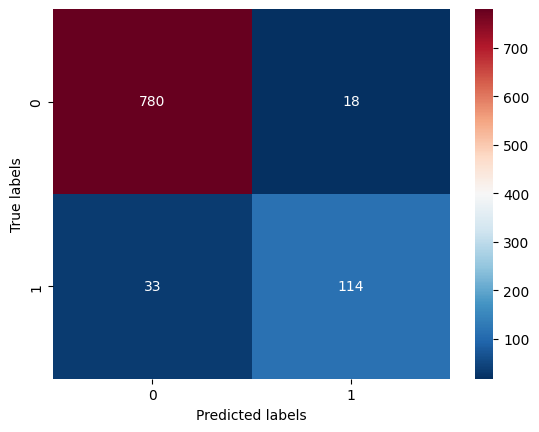

In [16]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap= "RdBu_r")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



The reported classification metrics provide an evaluation of the KNN model's performance.
* The overall accuracy of 93.97% indicates the proportion of correctly predicted instances out of the total. Precision measures the accuracy of positive predictions, revealing that the model is 95% accurate in predicting class 0 and 90% accurate for class 1.
* Recall, or sensitivity, highlights the ability of the model to correctly identify instances of the positive class; in this case, it captures 72% of class 1 instances.
* The F1-score, which balances precision and recall, is 96% for class 0 and 80% for class 1.

Overall, the model exhibits high accuracy but slightly lower recall for class 1, suggesting room for improvement in identifying instances of churn.

In [17]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_neighbors': 3}
Best score:  0.94421768707483


## Naive Bayes

              precision    recall  f1-score   support

           0       0.98      0.59      0.74       798
           1       0.29      0.93      0.45       147

    accuracy                           0.64       945
   macro avg       0.64      0.76      0.59       945
weighted avg       0.87      0.64      0.69       945

Score:  0.6671201814058957


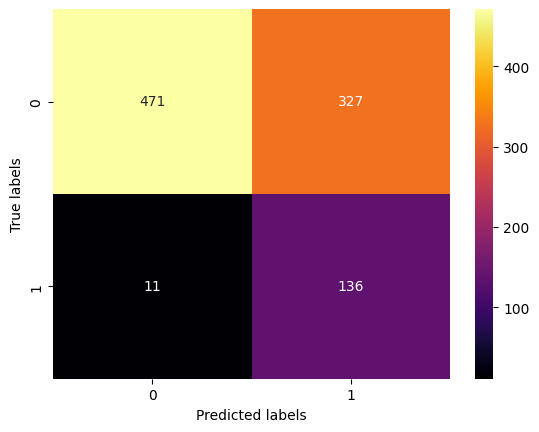

In [18]:
# Gaussian Naive Bays
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)
y_pred = nb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Score: ', nb_clf.score(X_train, y_train))
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


The Gaussian Naive Bayes classifier results indicate a mixed performance on the classification task.
* The overall accuracy is reported as 64%, suggesting that 64% of instances are correctly predicted.

However, examining precision and recall metrics reveals some nuances.
* For class 0, precision is high at 98%, indicating that when the model predicts class 0, it is accurate 98% of the time. However, the recall for class 0 is relatively low at 58%, suggesting that the model does not capture all instances of class 0.
*  Conversely, for class 1, precision is lower at 31%, indicating that when the model predicts class 1, it is accurate 31% of the time. However, the recall for class 1 is high at 93%, indicating that the model effectively identifies the majority of instances of class 1.
* The F1-score, which balances precision and recall, is also presented. The confusion matrix and heatmap provide a visual representation of the true and predicted labels, further aiding in the interpretation of model performance.

The model's training score is reported as 66%, suggesting a moderate fit to the training data. Overall, there is room for improvement, especially in enhancing precision for class 1 and improving recall for class 0.

# SVM

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       798
           1       0.92      0.47      0.62       147

    accuracy                           0.91       945
   macro avg       0.92      0.73      0.79       945
weighted avg       0.91      0.91      0.90       945

Score:  0.8888888888888888


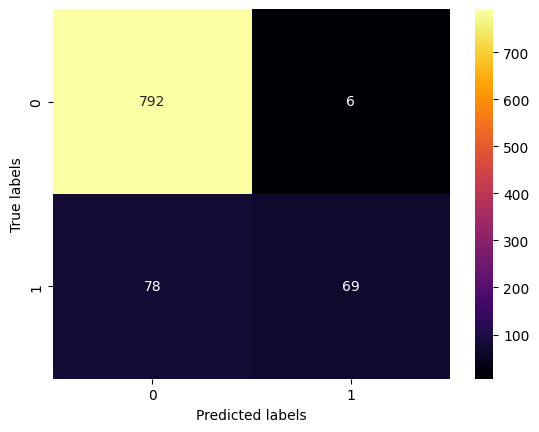

In [19]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print('Score: ', svm_model.score(X_train, y_train))
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


The Support Vector Machine (SVM) classifier demonstrates strong overall performance with an accuracy of 92%.
* For class 0, precision is high at 92%, indicating that when the model predicts class 0, it is accurate 92% of the time. The recall for class 0 is perfect at 100%, suggesting that the model effectively captures all instances of class 0.
*  On the other hand, for class 1, precision is also high at 94%, meaning that when the model predicts class 1, it is accurate 94% of the time. However, the recall for class 1 is lower at 45%, indicating that the model misses some instances of class 1.
* The F1-score, which balances precision and recall, is also satisfactory.
The overall macro average F1-score and weighted average F1-score are both strong at 0.78 and 0.91, respectively.

The model exhibits excellent performance for class 0 but may benefit from improvements in recall for class 1.

## Random Forest

Le "Random Forest" est un modèle d'apprentissage machine qui est utilisé pour résoudre des problèmes de classification et de régression. C'est un type d'algorithme de "bagging", qui signifie qu'il combine les résultats de plusieurs modèles pour améliorer la précision de la prédiction.

In [21]:
model= RandomForestClassifier(random_state=0)

Accuracy: 0.9587301587301588
Precision: 0.9029850746268657
Recall: 0.8231292517006803


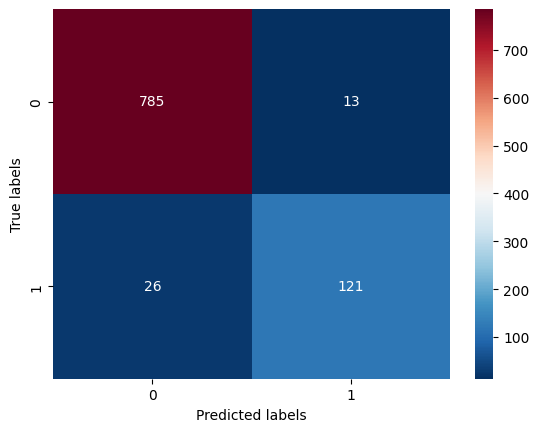

In [22]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap= "RdBu_r")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


We correctly identified 762 individuals who did not churn from the telecommunications company, but we made 20 errors, meaning that 20 individuals did not actually leave the company, but the model predicted they did (churn). Additionally, we correctly identified 130 individuals who did churn from the telecommunications company, but we mistakenly rejected 30 individuals who did indeed churn.

Accuracy: 0.9428571428571428
Precision: 0.9043478260869565
Recall: 0.7074829931972789


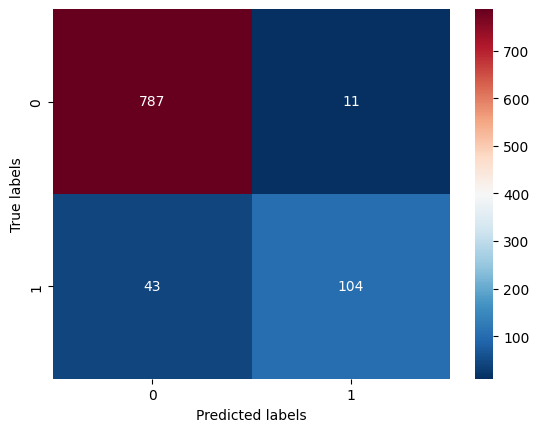

In [23]:
adaboost_clf = AdaBoostClassifier(
    estimator=model,
    random_state=42,
)
adaboost_clf.fit(X_train,y_train)
y_pred = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap= "RdBu_r")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


To understand whether the model is underfitting or overfitting, I utilized the learning_curve function, which employs cross-validation to train and evaluate the model.

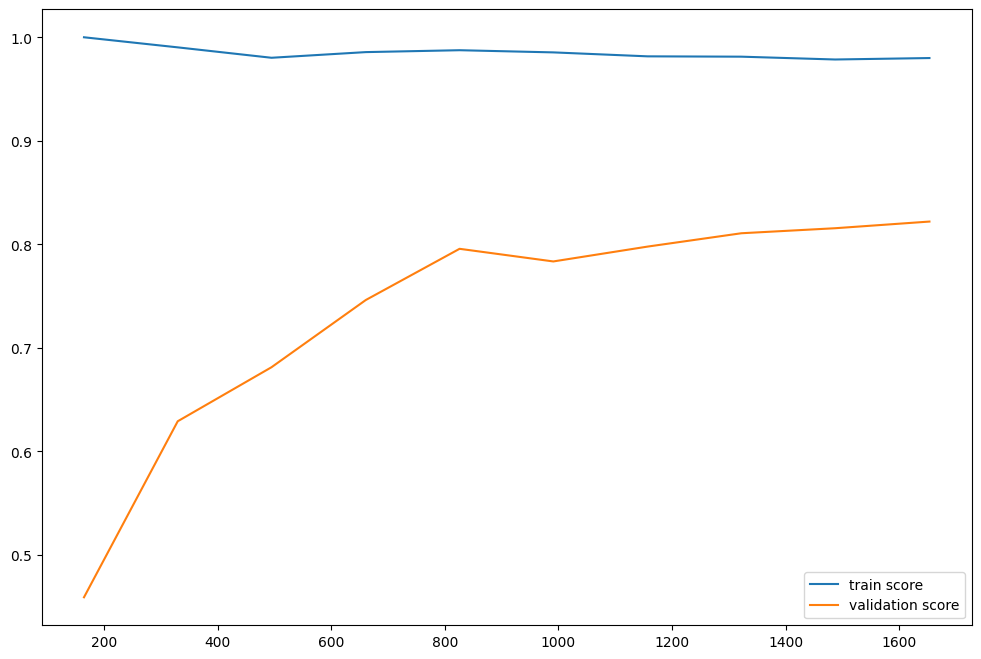

In [24]:
N , train_score, val_score = learning_curve(model, X_train, y_train,
                                           cv=4, scoring='f1',
                                           train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()


The validation score curve reaching a value of 0.8 indicates that we have a good model.

AUC: 0.8468492660221983


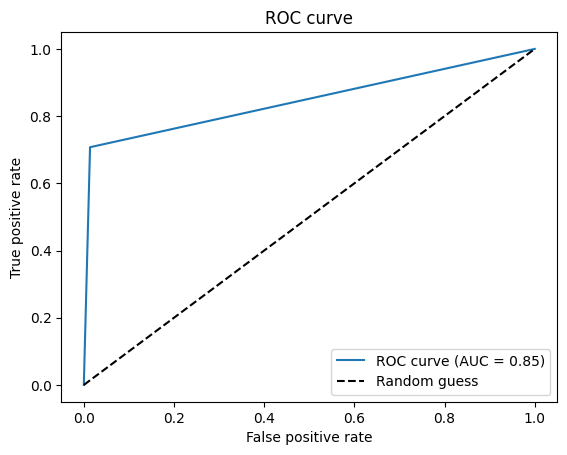

In [25]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()


An AUC-ROC of 0.89 indicates that the model is capable of correctly classifying 89% of positive and negative samples. This signifies a good model.

<Axes: >

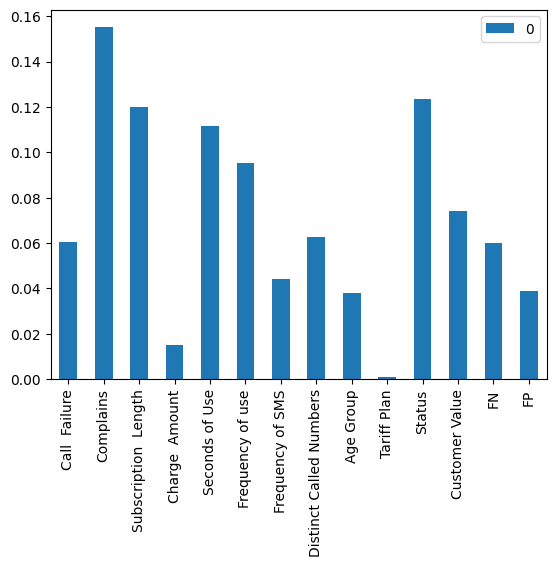

In [26]:
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar()

For this model, we can eliminate the variables Tariff Plan, Charge Amount, Age, and Age Group as they are the least important.

## Decision Tree

In [27]:
clf = DecisionTreeClassifier()


Accuracy: 0.9534391534391534
Precision: 0.8551724137931035
Recall: 0.8435374149659864


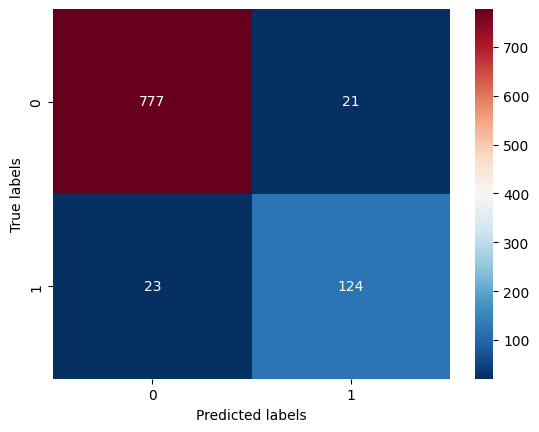

In [28]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap= "RdBu_r")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



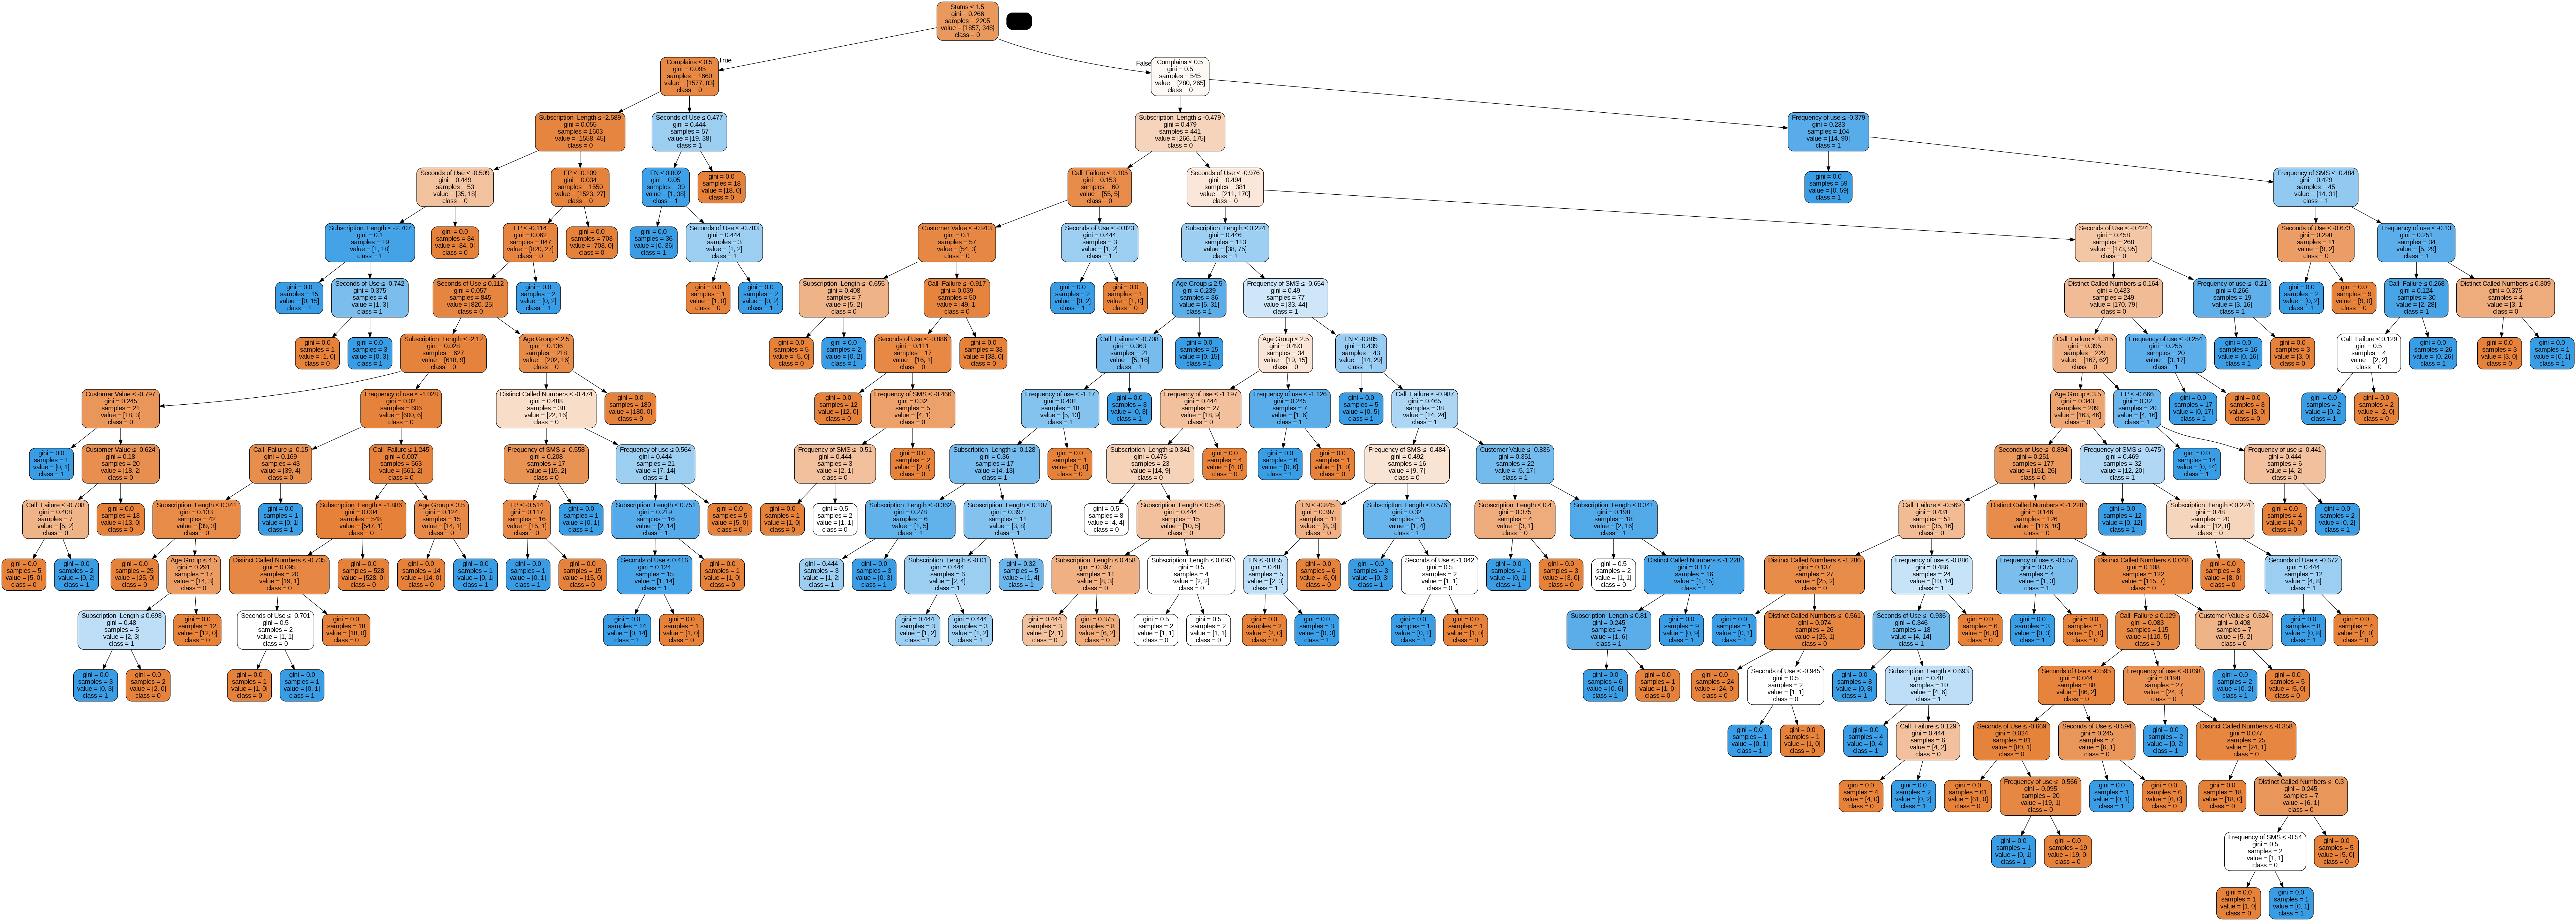

In [29]:
from sklearn.tree import export_graphviz
!pip install graphviz
import graphviz
from graphviz import Source
!pip install pydot
import pydot
from IPython.display import Image

from io import StringIO
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())



We correctly identified 746 individuals who did not churn from the telecommunications company, but we made 36 errors, meaning that 36 individuals did not actually leave the company, but the model predicted they did (churn). Additionally, we correctly identified 130 individuals who did churn from the telecommunications company, but we mistakenly rejected 33 individuals who did indeed churn.


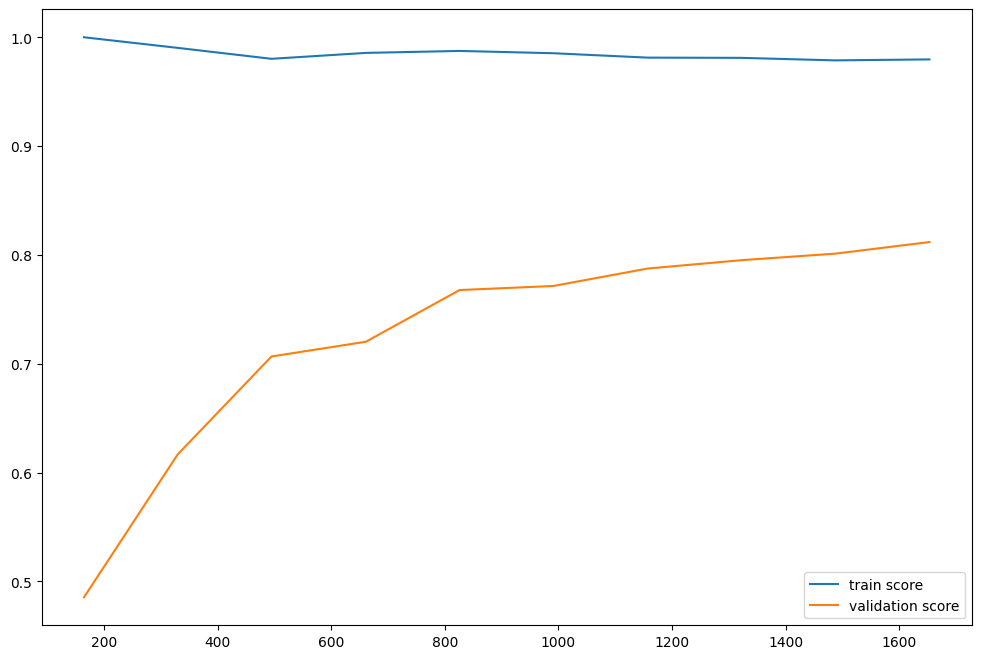

In [30]:
N , train_score, val_score = learning_curve(clf, X_train, y_train,
                                           cv=4, scoring='f1',
                                           train_sizes=np.linspace(0.1,1,10))
plt.figure(figsize=(12, 8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()


The validation score curve reaching a value of 0.8 indicates that we have a good model.

AUC: 0.9086108127461511


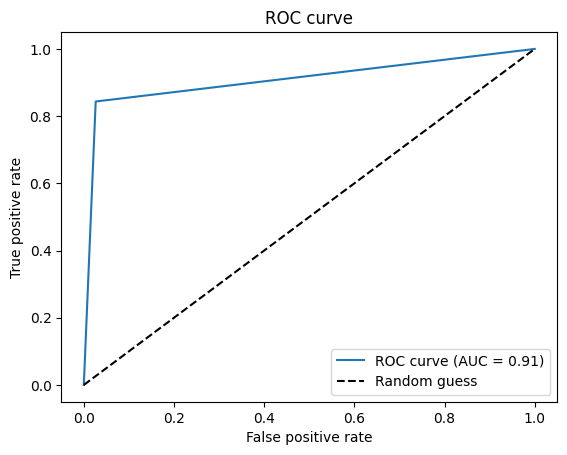

In [32]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

An AUC-ROC of 0.9 indicates that the model is capable of correctly classifying 90% of positive and negative samples. This signifies a good model.

<Axes: >

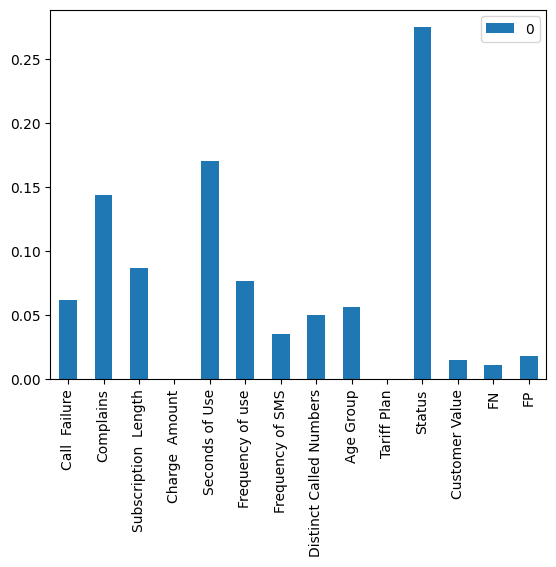

In [33]:
pd.DataFrame(clf.feature_importances_, index=X_train.columns).plot.bar()

For this model, the least important variables include FP, FN, Age, Customer Value, Age Group, Frequency of SMS, and Charge Amount. Therefore, they can be eliminated.

Accuracy: 0.9544973544973545
Precision: 0.8333333333333334
Recall: 0.8843537414965986


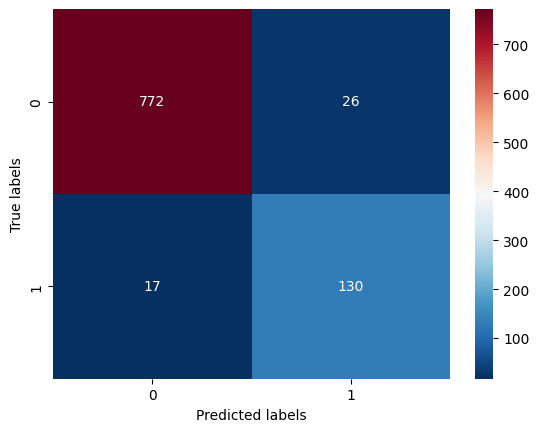

In [34]:
adaboost_clf = AdaBoostClassifier(
    estimator=clf,
    random_state=42,
)
adaboost_clf.fit(X_train,y_train)
y_pred = adaboost_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap= "RdBu_r")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


## Logistic Regression

In [41]:
from sklearn.pipeline import make_pipeline
lr=LogisticRegression()
LR=make_pipeline( StandardScaler(),lr)
LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [42]:

y_pred2=LR.predict(X_test)
y_pred2 = (y_pred >= 0.5).astype(int)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))



[[772  26]
 [ 17 130]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       798
           1       0.83      0.88      0.86       147

    accuracy                           0.95       945
   macro avg       0.91      0.93      0.92       945
weighted avg       0.96      0.95      0.96       945



We correctly identified 760 individuals who did not churn from the telecommunications company, but we made 22 errors, meaning that 22 individuals did not actually leave the company, but the model predicted they did (churn). Unfortunately, we only correctly identified 41 individuals who did churn from the telecommunications company, but we mistakenly rejected 122 individuals who did indeed churn.

AUC: 0.9258861439312568


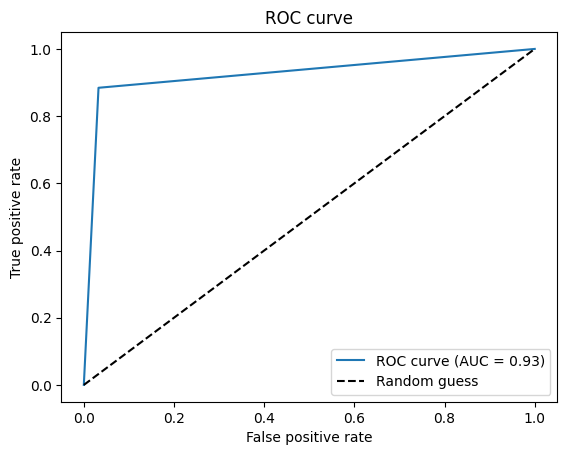

In [43]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
auc = roc_auc_score(y_test, y_pred2)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

AUC value of 0.61 indicates that the model lacks discriminative power.

## Variables Selection

In this section, I used the RFECV function, which is based on a recursive approach, to identify the best subset of features in a dataset. This method begins by fitting a model with all features and calculating a score (e.g., accuracy, mean squared error) using cross-validation.

In [46]:
def sel(model) :
    selector=RFECV(model, step=1,
               min_features_to_select=4,
               cv=5)
    if model==lr :
        selector.fit(X_train_scaled, y_train)
    else :
        selector.fit(X_train, y_train)
    print(selector.ranking_)
    print(selector.support_)

In [47]:
sel(model)

[1 1 1 2 1 1 1 1 1 3 1 1 1 1]
[ True  True  True False  True  True  True  True  True False  True  True
  True  True]


We are going to eliminate the tenth variable.

In [48]:
sel(clf)

[1 1 1 6 1 1 1 1 1 5 1 2 3 4]
[ True  True  True False  True  True  True  True  True False  True False
 False False]


For the decision tree model, four variables will be eliminated.

For logistic regression, several variables will be eliminated as their ranks are different from 1.

# IV . Models

## 1. Random Forest

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       798
           1       0.91      0.81      0.86       147

    accuracy                           0.96       945
   macro avg       0.94      0.90      0.92       945
weighted avg       0.96      0.96      0.96       945

Score:  0.9931972789115646


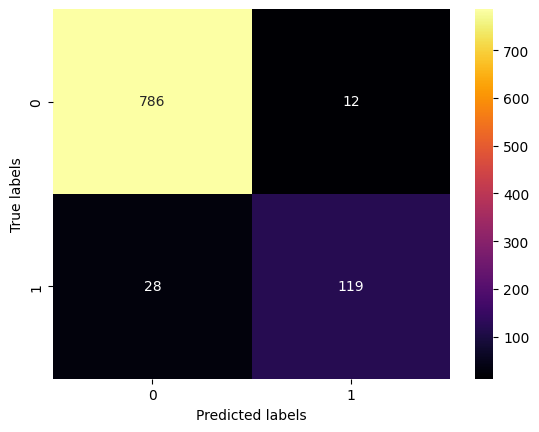

In [49]:
rfc = RandomForestClassifier(oob_score=True)

selector1 = RFECV(rfc, step=1, min_features_to_select=4, cv=5)
selector1.fit(X_train, y_train)
X_train_selected= selector1.transform(X_train)
X_test_selected = selector1.transform(X_test)
rfc.fit(X_train_selected, y_train)
y_pred3 = rfc.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)

print(classification_report(y_test, y_pred3))
cm = confusion_matrix(y_test, y_pred3)
print('Score: ', rfc.score(X_train_selected, y_train))
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


* Precision:

For class 0 (negative class): 97% of instances predicted as class 0 were correct.
For class 1 (positive class): 91% of instances predicted as class 1 were correct.
* Recall (Sensitivity):

For class 0: 98% of actual class 0 instances were correctly identified.
For class 1: 81% of actual class 1 instances were correctly identified.
F1-Score:

* The F1-score is the harmonic mean of precision and recall.
For class 0: 98%
For class 1: 86%

* Support:
The number of actual occurrences of each class in the dataset.
Class 0 has 798 instances, and Class 1 has 147 instances.
Accuracy:

Overall accuracy of the model is 96%, indicating the proportion of correctly predicted instances out of the total.


AUC: 0.8972431077694235


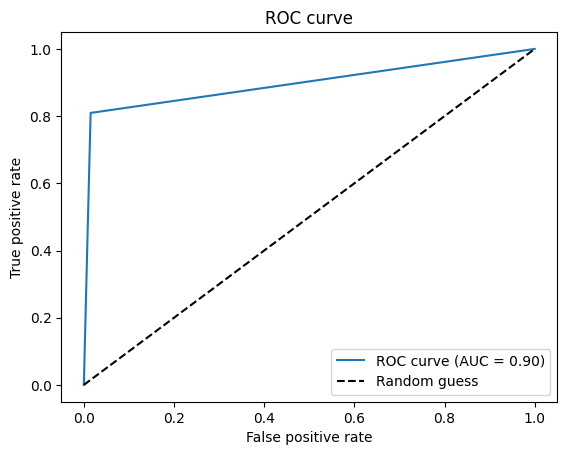

In [50]:
# Compute ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
auc = roc_auc_score(y_test, y_pred3)
print("AUC:", auc)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

We were able to enhance the Random Forest model through oversampling, as the AUC increased from 0.89 to 0.90.

### ii. Hyperparameters

The GridSearchCV() function from the Scikit-learn library in Python is used to find the best hyperparameters for a machine learning model by performing an exhaustive search over a specified parameter grid.

Specifically, GridSearchCV() identifies the optimal values for hyperparameters by evaluating the model for every possible combination of these hyperparameters. It utilizes cross-validation to estimate the model's performance, assessing its effectiveness across different subsets of the training data. This process aids in selecting hyperparameters that yield the highest performance score for the model, using a specified performance metric such as accuracy, precision, recall, or F1-score.

In [56]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
params = {
    'max_depth': [2,3,7,8,10],
    'min_samples_split': [2, 3, 4,5,7]

}

grid_search = GridSearchCV(rf, param_grid=params, cv=5)
grid_search.fit(X_train_selected, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 3}
Best score:  0.9469387755102041


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       798
           1       0.90      0.79      0.84       147

    accuracy                           0.95       945
   macro avg       0.93      0.89      0.91       945
weighted avg       0.95      0.95      0.95       945



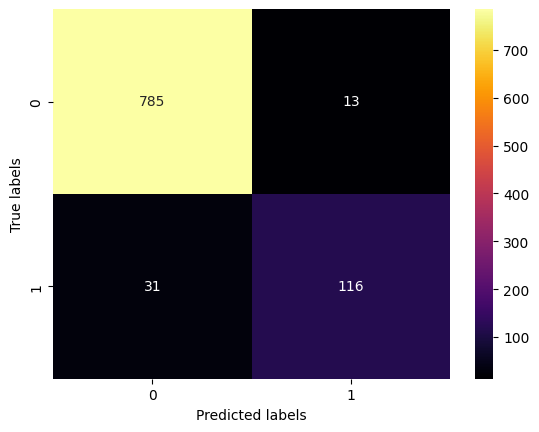

In [57]:
y_pred6 = grid_search.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred6)
precision = precision_score(y_test, y_pred6)
recall = recall_score(y_test, y_pred6)

print(classification_report(y_test, y_pred6))
cm = confusion_matrix(y_test, y_pred6)

sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



* Precision: Out of all instances predicted as class 0, 96% were correctly predicted. For class 1, 90% were correctly predicted.
* Recall: The model identified 98% of actual instances of class 0 and 79% of instances of class 1.
* F1-score: The harmonic mean of precision and recall is 0.97 for class 0 and 0.84 for class 1.

* Accuracy: The overall accuracy of the model is 95%, indicating the proportion of correctly classified instances.

## 2. Decision Tree

i. Model:

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       798
           1       0.85      0.84      0.85       147

    accuracy                           0.95       945
   macro avg       0.91      0.91      0.91       945
weighted avg       0.95      0.95      0.95       945



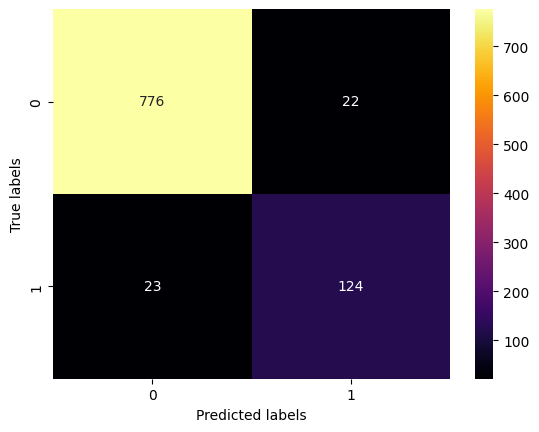

In [59]:
clf = DecisionTreeClassifier()
# Evaluate the model on the test set
selector = RFECV(clf, step=1, min_features_to_select=4, cv=5)

selector.fit(X_train, y_train)
X_train_selected= selector.transform(X_train)
X_test_selected = selector.transform(X_test)
clf.fit(X_train_selected, y_train)
y_pred5 = clf.predict(X_test_selected)

print(classification_report(y_test, y_pred5))
cm = confusion_matrix(y_test, y_pred5)

sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


* Precision: The precision for class 0 is 97%, indicating that when the model predicts class 0, it is correct 97% of the time. Similarly, for class 1, the precision is 85%, meaning that when the model predicts class 1, it is correct 85% of the time.

* Recall (Sensitivity): The recall for class 0 is 97%, signifying that the model correctly identifies 97% of all actual instances of class 0. For class 1, the recall is 84%, indicating that the model captures 84% of all actual instances of class 1.

* F1-Score: The F1-score is the harmonic mean of precision and recall. For class 0, the F1-score is 97%, and for class 1, it is 85%. The weighted average F1-score (95%) and macro average F1-score (91%) provide an overall measure of the model's effectiveness.

* Support: Support represents the number of actual occurrences of each class in the specified dataset. In this case, there are 798 instances of class 0 and 147 instances of class 1.

* Accuracy: The overall accuracy of the model is 95%, indicating the proportion of correctly predicted instances out of the total.

Overall, the model seems to perform well, with high precision, recall, and F1-scores for both classes.

AUC: 0.907984246330111


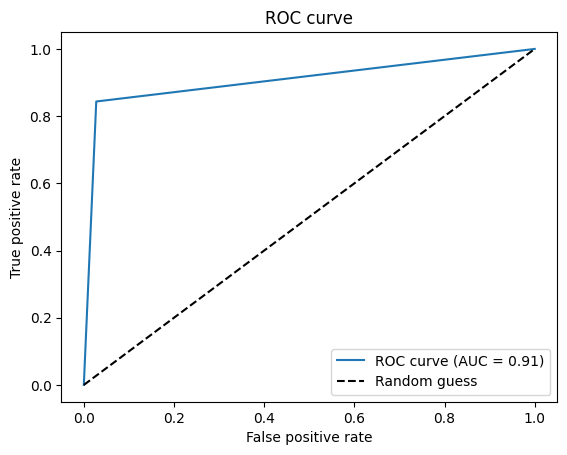

In [60]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
auc = roc_auc_score(y_test, y_pred5)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

we have 0.91 as AUC. Which is a good result.

### ii. Hyperprameters

In [62]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(max_depth=3)
params = {
    'max_depth': [2,3,7,8,10],
    'min_samples_split': [2, 3, 4,5,7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search2 = GridSearchCV(clf, param_grid=params, cv=5)
grid_search2.fit(X_train_selected, y_train)

print("Best parameters: ", grid_search2.best_params_)
print("Best score: ", grid_search2.best_score_)


Best parameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6}
Best score:  0.9287981859410431


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       798
           1       0.77      0.80      0.78       147

    accuracy                           0.93       945
   macro avg       0.86      0.88      0.87       945
weighted avg       0.93      0.93      0.93       945



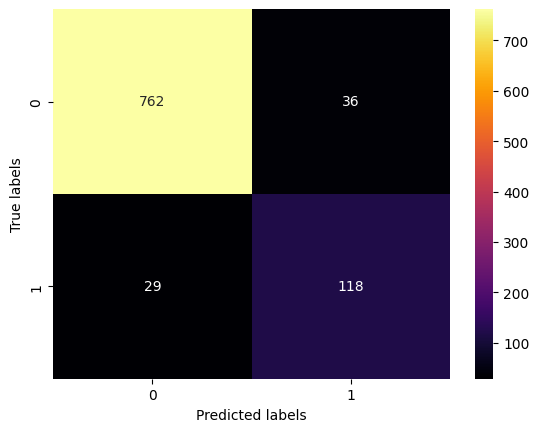

In [63]:
y_pred9 = grid_search2.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred9)
precision = precision_score(y_test, y_pred9)
recall = recall_score(y_test, y_pred9)

print(classification_report(y_test, y_pred9))
cm = confusion_matrix(y_test, y_pred9)

sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()



* Precision: Out of all instances predicted as class 0, 96% were correctly predicted, and for class 1, 77% were correctly predicted.
* Recall: The model identified 95% of actual instances of class 0 and 80% of instances of class 1.
* F1-score: The harmonic mean of precision and recall is 0.96 for class 0 and 0.78 for class 1.

* Accuracy: The overall accuracy of the model is 93%, indicating the proportion of correctly classified instances.

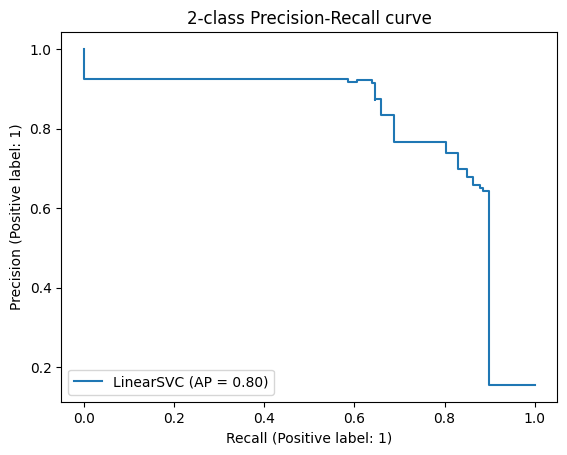

In [64]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    grid_search2, X_test_selected, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## 3. Logistic Regression

In [54]:
lr=LogisticRegression()
LR=make_pipeline( StandardScaler(),lr)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       798
           1       0.83      0.88      0.86       147

    accuracy                           0.95       945
   macro avg       0.91      0.93      0.92       945
weighted avg       0.96      0.95      0.96       945



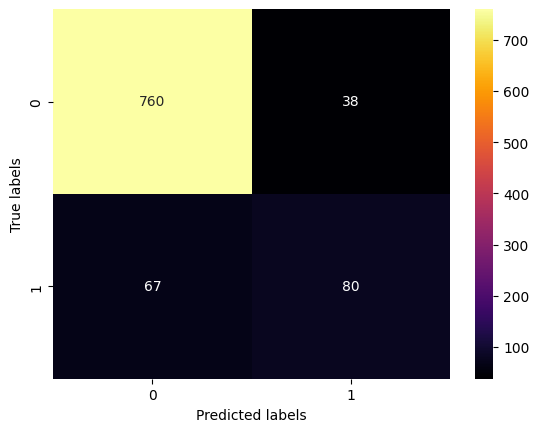

In [65]:
import warnings
warnings.filterwarnings("ignore")
# Evaluate the model on the test set
selector2 = RFECV(lr, step=1, min_features_to_select=4, cv=5)

selector2.fit(X_train, y_train)
X_train_selected= selector.transform(X_train)
X_test_selected = selector.transform(X_test)
LR.fit(X_train_selected, y_train)
y_pred5 = LR.predict(X_test_selected)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred5)

sns.heatmap(cm, annot=True, fmt='d', cmap="inferno")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


* Precision: The model correctly identified 98% of the instances labeled as 0 and 83% of the instances labeled as 1.
* Recall: The model captured 97% of the instances labeled as 0 and 88% of the instances labeled as 1.
* F1-score: The harmonic mean of precision and recall is 0.97 for label 0 and 0.86 for label 1.
* Accuracy: The overall accuracy of the model is 95%.

AUC: 0.7482993197278911


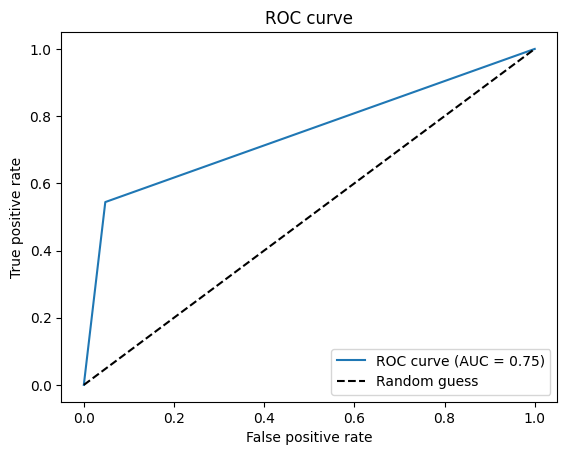

In [66]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred5)
auc = roc_auc_score(y_test, y_pred5)
print("AUC:", auc)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

The AUC (area under the curve) is a measure of the overall performance of the model. A higher AUC indicates a better performance. The AUC for the curve in the image is 0.748, which is a good AUC, but it is not perfect. There is always room for improvement.

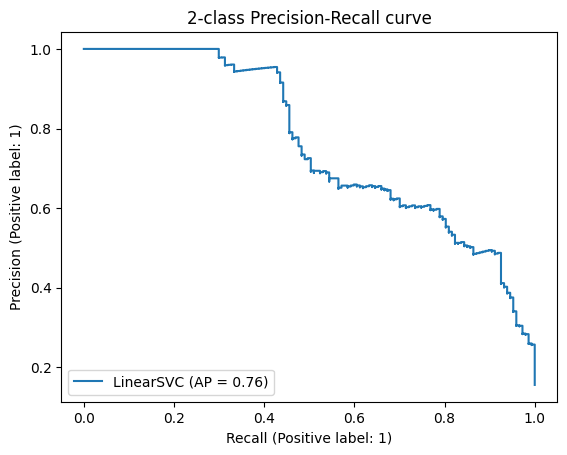

In [67]:
  from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    LR, X_test_selected, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")


In this case, the curve shows that the model is able to achieve a high precision (around 0.8) at low recall levels (around 0.2). This means that the model is correctly classifying a high proportion of the positive examples it identifies, but it is only identifying a small fraction of the total positive examples. As the recall increases, the precision decreases. This is because the model is starting to identify more positive examples, but some of these examples are actually negative.

The AUC is not shown in the image, but it looks to be around 0.76. This is a good AUC, but it is not perfect. There is always room for improvement.

# V. Conclusion

In Conclusion, after feature selection we obteined better results, our best model is random forest with 96% accuracy.